<a href="https://colab.research.google.com/github/11jolek11/BigData/blob/yfinance/List5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import seaborn as sns
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [55]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

# Load data

In [136]:
iris = datasets.load_iris(as_frame=True)
wine = datasets.load_wine(as_frame=True)
california_housing = datasets.fetch_california_housing(as_frame=True)

Iris

In [ ]:
iris.target_names

In [ ]:
iris.frame

In [ ]:
iris.frame.info()

In [ ]:
sns.heatmap(iris.frame.corr(), annot=True, cmap='rainbow')

In [ ]:
sns.pairplot(iris.frame, hue='target', height=2.5)

Wine

In [ ]:
wine.frame

In [ ]:
wine.frame.info()

In [ ]:
fig, axes = plt.subplots(figsize=(10,10))
sns.heatmap(wine.frame.corr(), annot=True, cmap='crest', robust=True, ax=axes)

In [ ]:
sns.pairplot(wine.frame, hue='target', height=2.5)

California

In [ ]:
california_housing.frame.info()

In [ ]:
fig, axes = plt.subplots(figsize=(10,10))
sns.heatmap(california_housing.frame.corr(), annot=True, cmap='crest', robust=True, ax=axes)

In [ ]:
temp_scaler = StandardScaler(copy=True)

standardized_housing = pd.DataFrame(temp_scaler.fit_transform(california_housing.frame), columns=california_housing.frame.columns)
sns.jointplot(data=standardized_housing, x='MedHouseVal', y='MedInc', kind="kde")

# Zad 1

In [118]:
pca_pipeline = Pipeline(
    [
      ('scaler', StandardScaler()),
      ('dim_reduction', PCA(n_components=2)),
    ]
)

In [128]:
iris_df = iris.frame.drop(['target'], axis=1)

In [166]:
iris_pca = pd.DataFrame(data=pca_pipeline.fit_transform(iris_df), columns = ['pca1', 'pca2'])

In [ ]:
sns.scatterplot(data=iris_pca, x='pca1', y='pca2', hue=iris.frame['target'])

In [133]:
wine_df = wine.frame.drop(['target'], axis=1)

In [134]:
wine_pca = pd.DataFrame(data = pca_pipeline.fit_transform(wine_df), columns = ['pca1', 'pca2'])

In [ ]:
sns.scatterplot(data=wine_pca, x='pca1', y='pca2', hue=wine.frame['target'])

# Zad 2

In [167]:
# california_housing.frame.info()
california_pca = pd.DataFrame(pca_pipeline.fit_transform(california_housing.frame), columns = ['pca1', 'pca2'])

<Axes: xlabel='pca1', ylabel='pca2'>

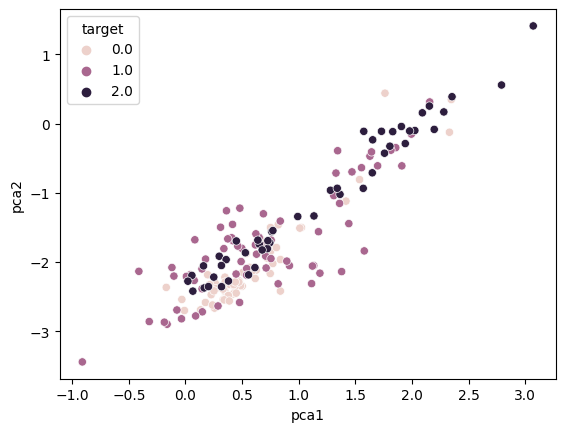

In [168]:
sns.scatterplot(data=california_pca, x='pca1', y='pca2', hue=wine.frame['target'])